# Descriptive Statistics

#### Import pandas and the pokemon dataset

In [ ]:
#! pip install scipy

In [41]:
import pandas as pd
from scipy import stats
%matplotlib inline

In [14]:
pokemon = pd.read_csv('pokemon.csv', index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### Identify nominal, ordinal and metric variables

In [19]:
#pokemon['Generation'] = 1
pokemon.Generation.unique()

array([1, 2, 3, 4, 5, 6])

Name: nominal
Type 1: nominal
Type 2: nominal
Total: metric
HP: metric
Attack: metric
Defense: metric
Sp. Attack: metric
Sp. Defense: metric
Speed: metric
Generation: ordinal
Legendary: ordinal

#### Find the implementations in pandas / scipy

In [29]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [31]:
attack = pokemon['Attack']

In [32]:
attack.mean()

79.00125

In [33]:
attack.median()

75.0

In [37]:
minimum = attack.min()

In [36]:
maximum = attack.max()

In [38]:
attack_range = maximum - minimum
attack_range

185

In [43]:
attack.var()

1053.4805991864816

In [44]:
attack.std()

32.45736586949843

In [45]:
import numpy as np

np.sqrt(attack.var())

32.45736586949843

In [48]:
attack.quantile(q=0.1)

40.0

In [49]:
attack.quantile(.75) - attack.quantile(.25)

45.0

In [50]:
stats.iqr(attack)

45.0

In [80]:
stats.skew(pokemon['HP'])

1.5652824223266586

In [52]:
stats.kurtosis(attack)

0.16116779962933592

In [55]:
stats.hmean(attack)

62.60579568699287

In [53]:
stats.gmean(attack)

71.8027939094581

In [56]:
attack.mean()

79.00125

In [70]:
stats.mode(attack)

ModeResult(mode=array([100]), count=array([40]))

In [63]:
len(attack)

800

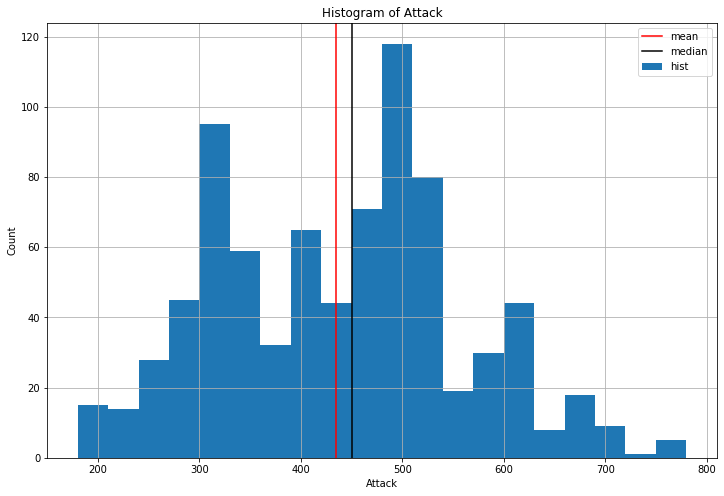

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
pokemon['Total'].hist(bins=20)
plt.ylabel('Count')
plt.xlabel('Attack')
plt.title('Histogram of Attack')
plt.axvline(pokemon['Total'].mean(), color='r')
plt.axvline(pokemon['Total'].median(), color='k')
plt.legend(['mean', 'median', 'hist'])

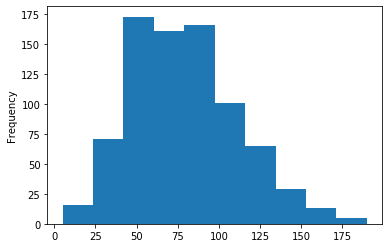

In [68]:
attack.plot(kind='hist')

#### Box plot

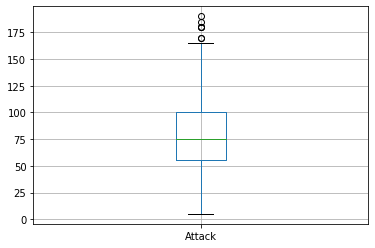

In [89]:
pokemon[['Total']].boxplot()

In [87]:
pd.DataFrame(pokemon['Attack'])

,Attack
#,
1,49
2,62
3,82
3,100
4,52
5,64
6,84
6,130
6,104


### Joint Distributions

In [90]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

In [92]:
type(ax)

matplotlib.axes._subplots.Axes3DSubplot

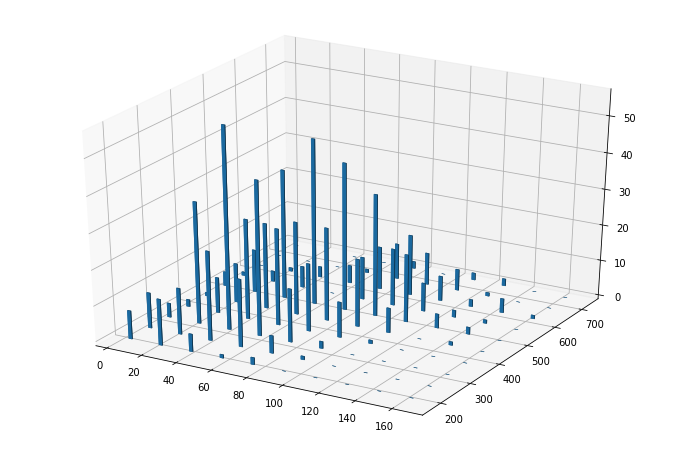

In [91]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(df['Speed'], df['Total']) #, range=[[0, 120], [0, 120]]

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 2 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', shade=True)

In [94]:
! matplotlib --version

/bin/sh: matplotlib: command not found


#### Correlation

In [95]:
pokemon.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [96]:
pokemon.Legendary.mean()

0.08125

In [97]:
pokemon.max()

Name          Zygarde50% Forme
Type 1                   Water
Total                      780
HP                         255
Attack                     190
Defense                    230
Sp. Atk                    194
Sp. Def                    230
Speed                      180
Generation                   6
Legendary                 True
dtype: object